<a href="https://colab.research.google.com/github/gksdydcks/Ai/blob/main/04_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 04.자동미분(Autograd)


In [ ]:
import torch

#### 4-1. reauires_grad

In [ ]:
x = torch.ones(3, requires_grad =True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [ ]:
y = 2*x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


<ipython-input-30-676acbcf737c>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [ ]:
z = y**2
print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
None
True


<ipython-input-31-72c026d2078c>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(z.grad)


## 4-2. backward()
- x->y->z 순으로 된 계산에서 역전파를 통해 기울기를 구함(노드= x,y,z)

In [ ]:
result = z.sum()
print(result)
result.backward()

tensor(12., grad_fn=<SumBackward0>)


In [ ]:
print(z)
print(x.grad)


tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3. no_grad()
- 역전파를 중지

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
print (x.requires_grad)

with torch.no_grad():
    y = x**2
    print (x.requires_grad)
    print (y.requires_grad)

True
True
False


### 4-4. detach()
- 그래프에서 연산을 분리

In [ ]:
y.detach()

tensor(1.)

### 실습1. 선형회귀 실습
- 입 출력 정의 > 모델 만들기 > 손실함수 정의 > weight최적화

Epoch [50/400], Loss : 3.9190
Epoch [100/400], Loss : 3.8282
Epoch [150/400], Loss : 3.7730
Epoch [200/400], Loss : 3.7394
Epoch [250/400], Loss : 3.7190
Epoch [300/400], Loss : 3.7066
Epoch [350/400], Loss : 3.6990
Epoch [400/400], Loss : 3.6944


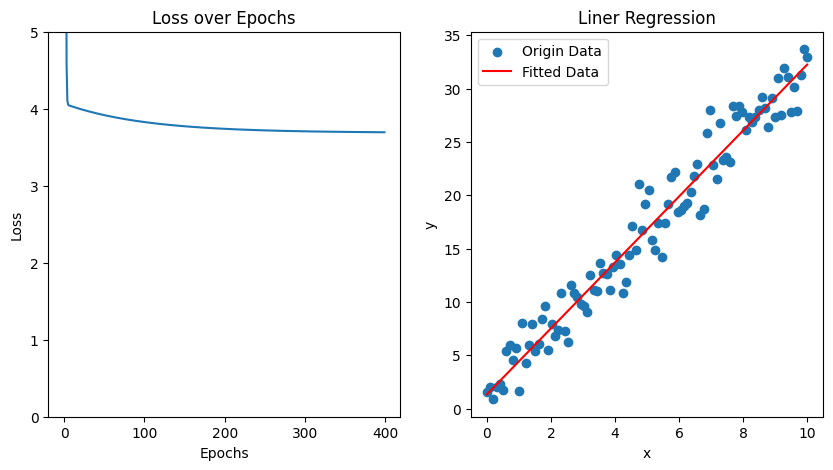

Model parameters
linear.weight:tensor([[3.0911]])
linear.bias:tensor([1.3469])


In [ ]:
          ###선형회귀 연습
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

    #1. 데이터 입출력 정의
x = torch.linspace(0,10,100).view(-1,1) #열기준 하나씩 땜 : 입력 데이터
y = 3 * x + 2+torch.randn(100,1)*2  #노이즈 추가:torch.randn

    #2. 모델 정의(선형회귀)
class LinearRegressionMdel(nn.Module):
    def __init__(self):
        super(LinearRegressionMdel, self).__init__()
        self.linear = nn.Linear(1,1) #(입력1개,출력 1개)

    def forward(self,x):    #순전파
        return self.linear(x)

model = LinearRegressionMdel()

    #3. 손실함수 정의
    #((손실함수 선택 : MSE,MAE.. 등)(Mean Squared Error)
loss_function = nn.MSELoss()

    #4. 가중치 업데이트
    #(경사하강법 -> 어떤것을 사용할지 선택)
optimizer = optim.SGD(model.parameters(),lr = 0.01) #가중치,편향

    #5. 학습 반복
epochs = 400 #반복횟수 400번
losses = []

for epoch in range(epochs): #지정한 반복횟수 만큼 돌리기
    optimizer.zero_grad() #기울기 초기화
    outputs = model(x)  #예측값 계산
    loss = loss_function(outputs,y) #손실계산
    loss.backward() #역전파
    optimizer.step() #가중치 업데이트
    losses.append(loss.item())  #손실값 저장
    if (epoch +1)% 50 == 0:#(epoch +1)이 50으로 나눴을때 출력/50번째마다 출력
      print(f"Epoch [{epoch +1}/{epochs}], Loss : {loss.item():.4f}")

     #6.결과 시각화
plt.figure(figsize=(10,5))

      #손실감소 그래프
plt.subplot(1,2,1)#(1행2열 1번째자리)
plt.plot(losses)
plt.ylim(0,5)#0~5사이 표현
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

    #  데이터와 예측결과 시각화
plt.subplot(1,2,2)
plt.scatter(x.numpy(),y.numpy(), label="Origin Data")
plt.plot(x.numpy(),model(x).detach().numpy(),color = "red", label="Fitted Data")
plt.title("Liner Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#최종모델 파라미터 확인
print("Model parameters")
for name,param in model.named_parameters():
    print(f"{name}:{param.data}")
